<a href="https://colab.research.google.com/github/anieruth007/Projects/blob/main/ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('Student_Performance.csv')
#to see what my dataset is comprised of
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# New Section

In [59]:
print(dataset.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [60]:
print(dataset.isnull().any())

Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool


In [61]:
dataset = dataset.drop('Extracurricular Activities', axis=1)
dataset = dataset.drop('Performance Index', axis=1)

In [62]:
!pip install statsmodels --quiet
import statsmodels.api as sm

In [63]:
X = dataset[['Hours Studied','Sleep Hours','Sample Question Papers Practiced']]
y = dataset['Previous Scores']  # Dependent variable


In [64]:
X = sm.add_constant(X)

In [65]:
model = sm.OLS(y, X).fit()

In [66]:
print(model.summary())  # The ANOVA table is included in the summary

                            OLS Regression Results                            
Dep. Variable:        Previous Scores   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8477
Date:                Tue, 30 Jul 2024   Prob (F-statistic):              0.468
Time:                        10:01:56   Log-Likelihood:                -42720.
No. Observations:               10000   AIC:                         8.545e+04
Df Residuals:                    9996   BIC:                         8.548e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [36]:
#performing  t-test
print(model.tvalues)

const                               85.251383
Hours Studied                       -1.253562
Sleep Hours                          0.592709
Sample Question Papers Practiced     0.808145
dtype: float64


In [67]:
#. P value in the dataset taken
print(model.pvalues)


const                               0.000000
Hours Studied                       0.210030
Sleep Hours                         0.553389
Sample Question Papers Practiced    0.419026
dtype: float64


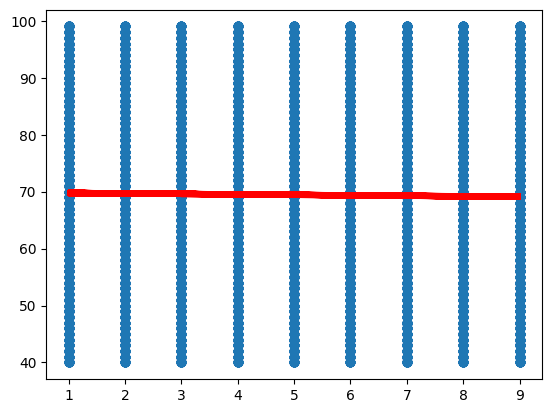

In [68]:
#Regressor line
plt.scatter(X['Hours Studied'], y)
plt.plot(X['Hours Studied'], model.predict(), color='red')

In [69]:
#R2 and Adjusted R2
print(model.rsquared)
print(model.rsquared_adj)




0.0002543467924538412
-4.569692099387623e-05
